#Problem 1

##Initials

In [389]:
#Setting dataset
import os
os.system("wget https://www.dropbox.com/s/3h0nmis5sdiu2go/ENB2012_data.csv")

0

In [390]:
import pandas as pd
import numpy as np
df=pd.read_csv("ENB2012_data.csv")

## Part 1

In [391]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


In [392]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


In [393]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
dtype: int64

In [394]:
#normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#for each column normalize data
for i,col in enumerate(df.columns):
    scaler.fit(df[[col]])
    df[[col]] = scaler.transform(df[[col]])

In [395]:
#making X,y
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

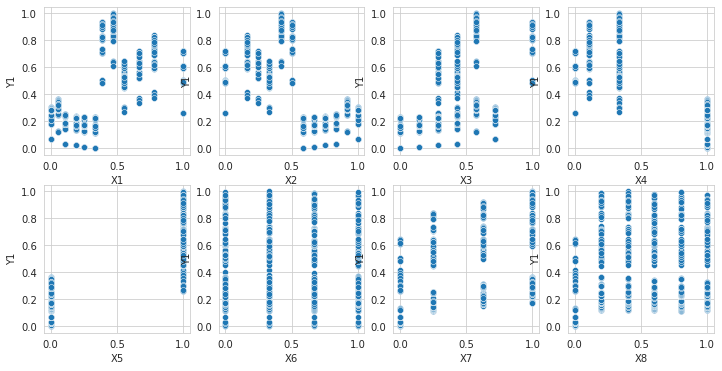

In [396]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2,4,figsize=(12, 6))
index = 0
axs = axs.flatten()
for i, column_name in enumerate(X.columns):
    sns.scatterplot(x=X[column_name], y=y, ax=axs[i])
    axs[i].set_xlabel(column_name)
    index += 1

In [397]:
#Splliting data
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=100)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=100)

##Part 2

In [398]:
#Implementing grid_search from scratch
from sklearn.metrics import mean_squared_error
import numpy as np

def grid_search(model, param_grid,X_train, y_train, X_val, y_val,cv=5):
    best_mse = np.inf
    best_params = {}
    best_model = None
    best_accuracy=-1
    for max_depth in param_grid["max_depth"]:
        for min_samples_split in param_grid["min_samples_split"]:
            for max_features in param_grid["max_features"]:
                for min_samples_leaf in param_grid["min_samples_leaf"]:
                    model.set_params(max_depth=max_depth, min_samples_split=min_samples_split, max_features=max_features, min_samples_leaf=min_samples_leaf)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_val)
                    mse = mean_squared_error(y_val, y_pred)
                    accuracy = 100 - (np.sum(np.abs(y_pred - y_val)) /len(y_val)) * 100
                    if mse < best_mse:
                        best_mse = mse
                        best_params = {"max_depth": max_depth, "min_samples_split": min_samples_split,"max_features": max_features, "min_samples_leaf": min_samples_leaf}
                        best_model = model
                        best_accuracy=accuracy

    return best_model, best_params, best_mse,best_accuracy


In [399]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {'max_depth': list(range(1, 11)), 'min_samples_split': list(range(2, 11)), 'max_features': list(range(1, X_train.shape[1])), 'min_samples_leaf': list(range(1, 11))}
dt = DecisionTreeRegressor()

# Using scratch builtgrid_search
bst_model,bst_param,bst_mse,bst_accuracy = grid_search(dt, param_grid,X_train,y_train,X_val,y_val)

print("Best parameters: ", bst_param)
print("Best mean_squared_error on validation set: ", bst_mse)
print("Best accuracy on validation set: ", bst_accuracy,"%",sep="")



Best parameters:  {'max_depth': 7, 'min_samples_split': 5, 'max_features': 6, 'min_samples_leaf': 1}
Best mean_squared_error on validation set:  0.00017414812495147292
Best accuracy on validation set: 99.1277134978491%


**Hyperparameters**

1.)Max depth of the tree controls the complexity of the model. A deeper tree allows the model to capture more information from the data,
but it also increases the risk of overfitting. A shallow tree has risk of underfitting

2.)Minimum number of samples required to split an internal node controls the complexity of the model by setting a threshold
for the amount of data needed to create a new split. Increasing the value of this will make model less overfit

3.)Maximum number of features to consider when looking for the best split controls the complexity of the model by setting a threshold
for the number of features to be considered at each split, thus making it high make it overfit

4.)The minimum number of samples required to be at a leaf node controls the complexity of the model by setting a threshold
for the amount of data needed to create a leaf. Increasing the value of this parameter will make the model to underfit

** **


**Working behind scratch built grid_search**

To find the optimal hyperparameter values, we need to vary these parameters (varying one while fixing others and doing this with all parameters), and comparing the performance on the validation set. Mean Squared Error (MSE) can be used as a metric to evaluate performance.

The scratch built function grid_search finds the optimal combination of hyperparameter values ​​that produce lower_mse on the validation set. The grid_search method considers all possible combinations of hyperparameter values ​​and returns the combination that gives the lowest_mean_squared_error.

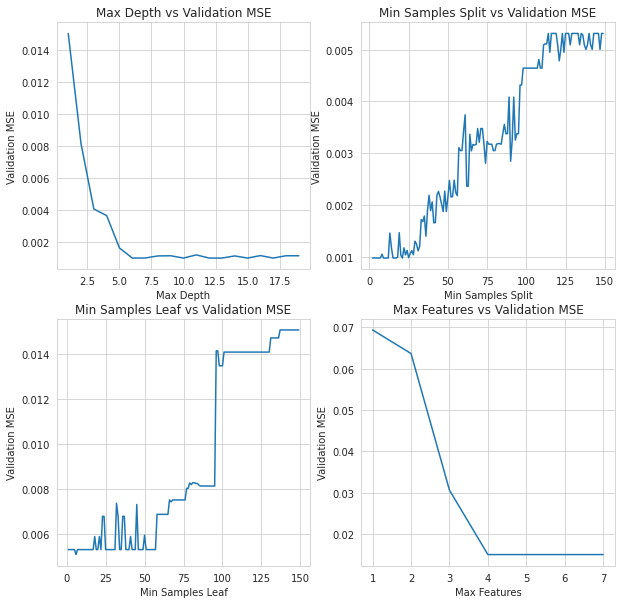

In [400]:
import matplotlib.pyplot as plt
import sklearn

model = sklearn.base.clone(bst_model)


fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot of max_depths vs corresponding MSE values
max_depths = []
mse_values = []
for max_depth in range(1, 20):
    model.set_params(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    max_depths.append(max_depth)
    mse_values.append(mse)
axs[0, 0].plot(max_depths, mse_values)
axs[0, 0].set_xlabel("Max Depth")
axs[0, 0].set_ylabel("Validation MSE")
axs[0, 0].set_title("Max Depth vs Validation MSE")

# Plot of min_samples_splits vs corresponding MSE values
min_samples_splits = []
mse_values = []
for min_samples_split in range(2, 150):
    model.set_params(min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    min_samples_splits.append(min_samples_split)
    mse_values.append(mse)
axs[0, 1].plot(min_samples_splits, mse_values)
axs[0, 1].set_xlabel("Min Samples Split")
axs[0, 1].set_ylabel("Validation MSE")
axs[0, 1].set_title("Min Samples Split vs Validation MSE")

# Plot of min_samples_leafs and corresponding MSE values
min_samples_leafs = []
mse_values = []
for min_samples_leaf in range(1, 150):
    model.set_params(min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    min_samples_leafs.append(min_samples_leaf)
    mse_values.append(mse)
axs[1, 0].plot(min_samples_leafs, mse_values)
axs[1, 0].set_xlabel("Min Samples Leaf")
axs[1, 0].set_ylabel("Validation MSE")
axs[1, 0].set_title("Min Samples Leaf vs Validation MSE")

# Plot of max_features and corresponding MSE values
max_features_values = []
mse_values = []
for max_features in param_grid["max_features"]:
    model.set_params(max_features=max_features)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    max_features_values.append(max_features)
    mse_values.append(mse)
axs[1, 1].plot(max_features_values, mse_values)
axs[1, 1].set_xlabel("Max Features")
axs[1, 1].set_ylabel("Validation MSE")
axs[1, 1].set_title("Max Features vs Validation MSE")

# Show the plot
plt.show()


##Part 3

Hold-out cross test MSE: 0.0006409046329380584
5-fold cross test MSE: 0.004379606046756723
Repeated 5-fold cross test MSE: 0.0008348340269028981
Test data MSE: 0.0002883265503553189
Accuracy: 99.02060160353673%


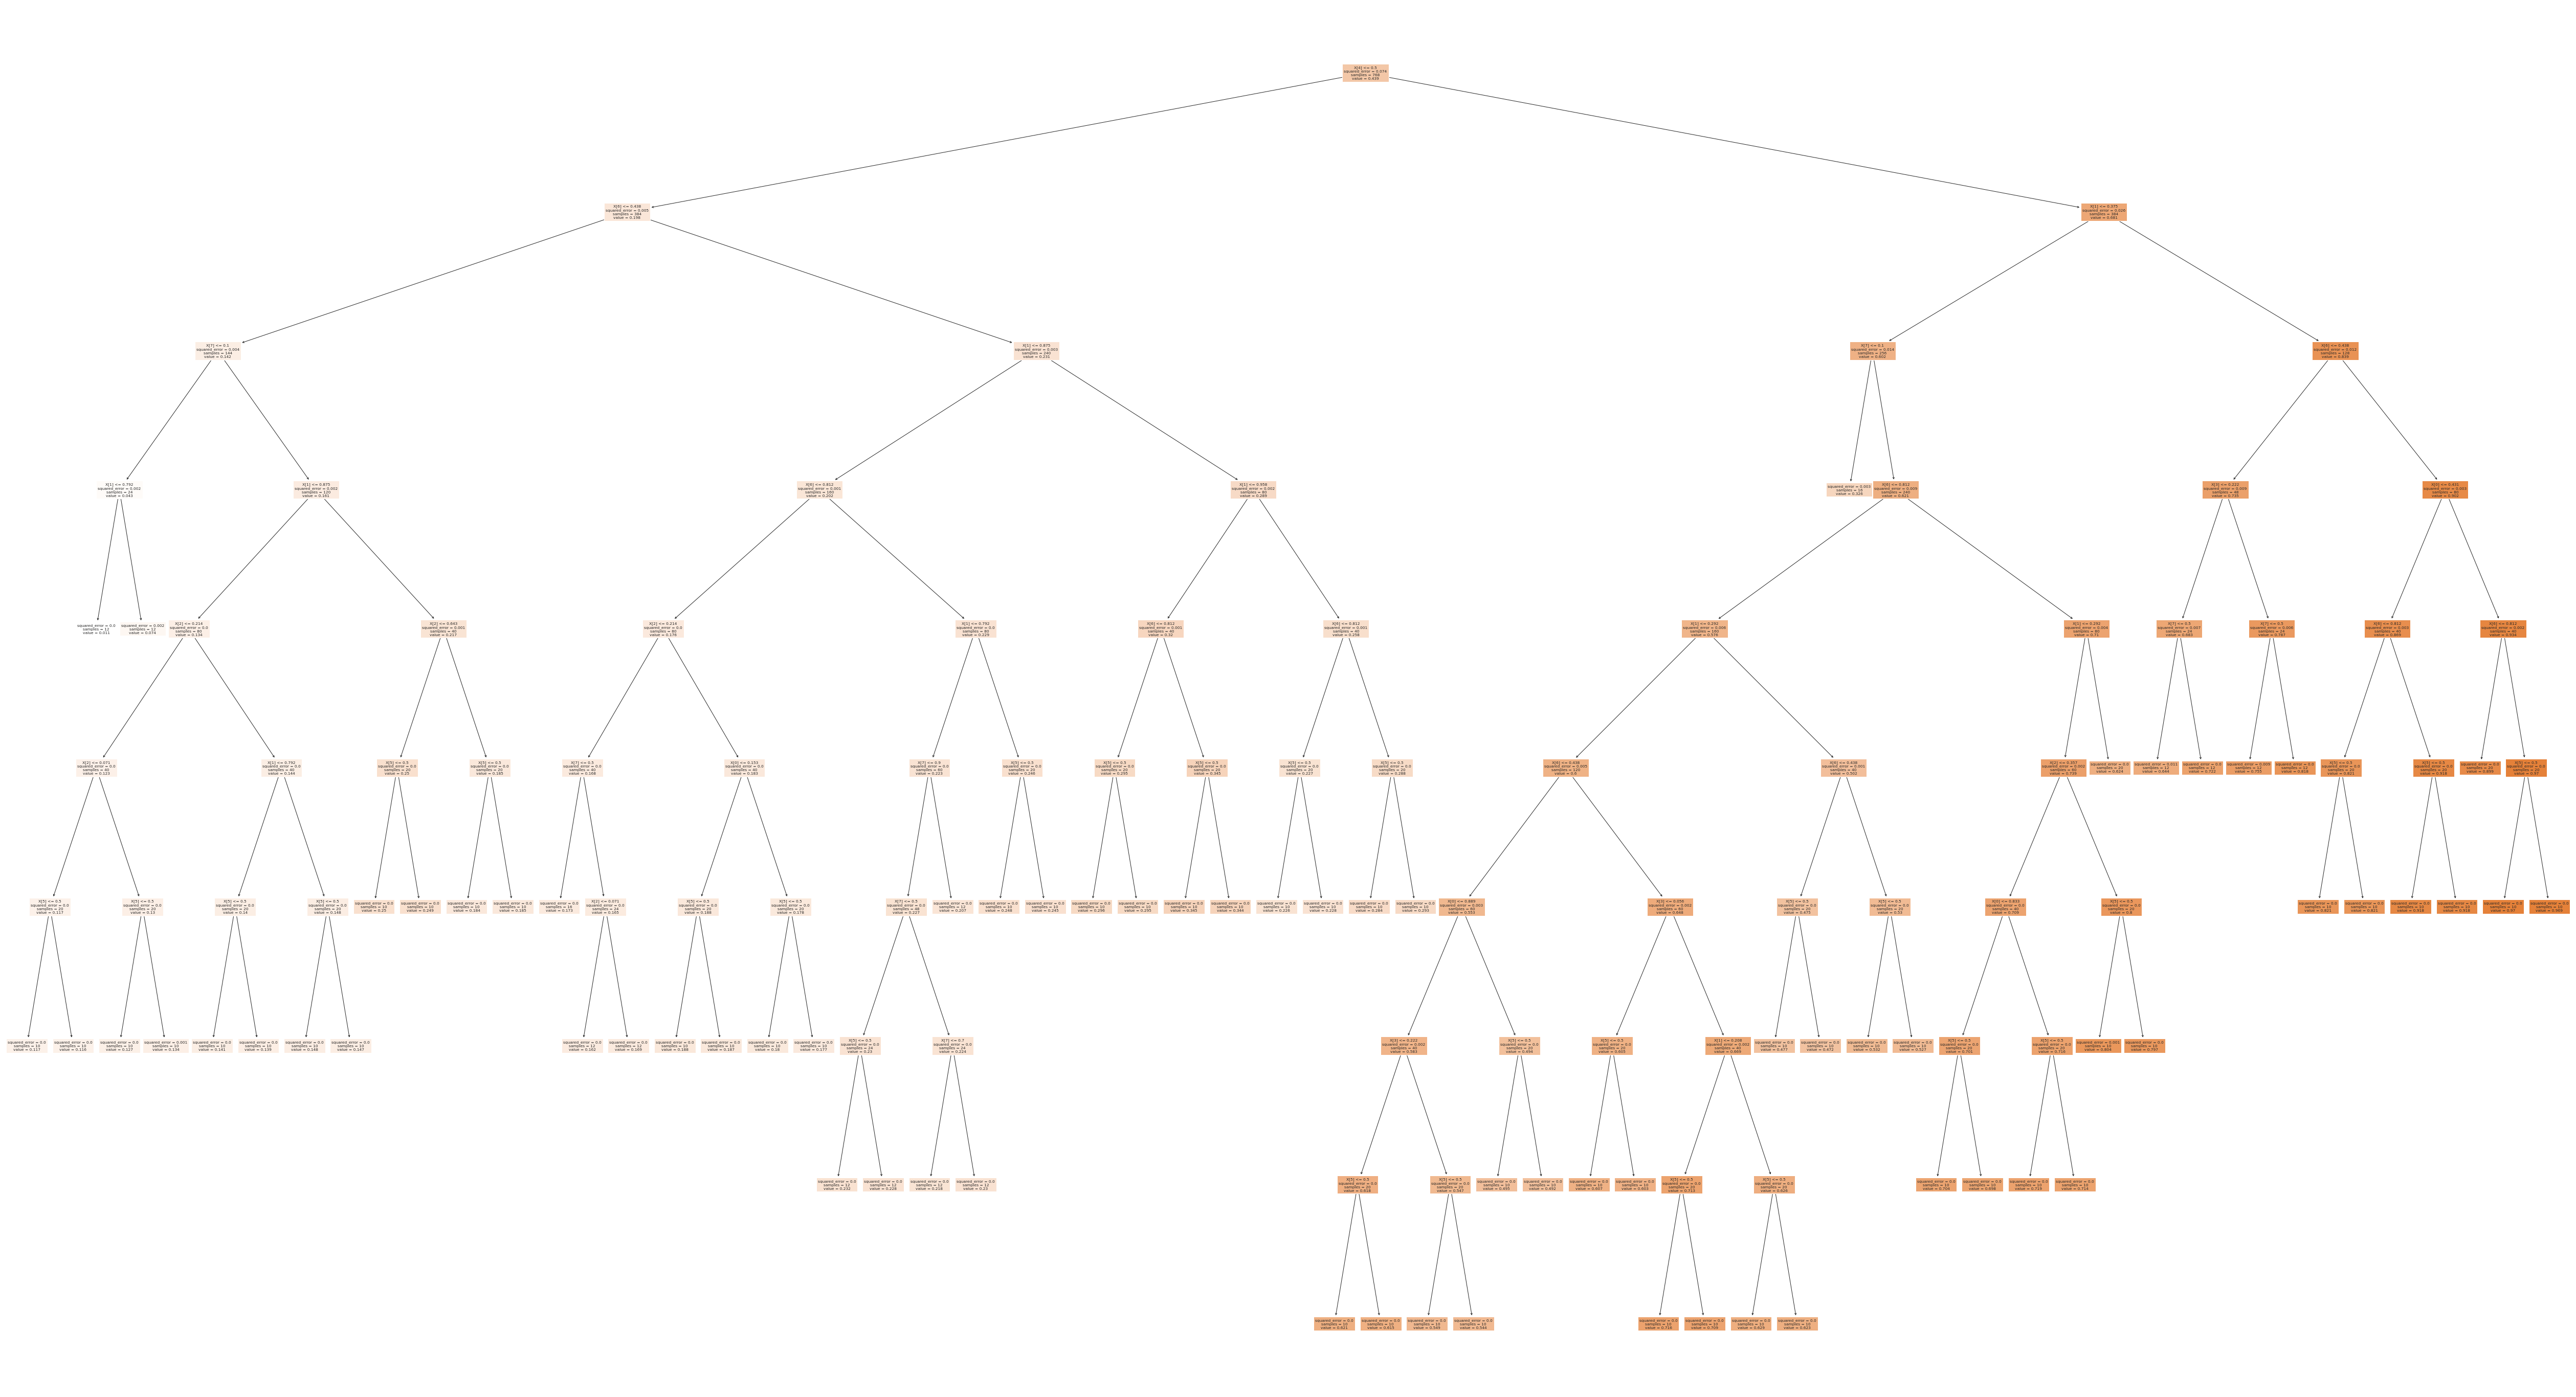

In [401]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, RepeatedKFold
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Hold-out cross test
y_test_pred = bst_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Hold-out cross test MSE:", test_mse)

# 5-fold cross test
scores = cross_val_score(bst_model, X, y, cv=5, scoring=make_scorer(mean_squared_error))
print("5-fold cross test MSE:", np.mean(scores))

# Repeated 5-fold cross test
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=100)
scores = cross_val_score(bst_model, X, y, cv=rkf, scoring=make_scorer(mean_squared_error))
print("Repeated 5-fold cross test MSE:", np.mean(scores))

# Test data prediction
bst_model.fit(X, y)
y_test_pred = bst_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test data MSE:", test_mse)

# Accuracy
accuracy=100-(np.sum(np.abs(y_test_pred-y_test))/len(y_test))*100
print("Accuracy: ",accuracy,"%",sep="")

# Plot decision tree
plt.figure(figsize=(90,50))
plot_tree(bst_model, filled=True)
plt.show()

##Part 4

Best parameters:  {'max_depth': 9, 'min_samples_split': 9, 'max_features': 5, 'min_samples_leaf': 1}
Best L2/mean_squared_error on validation set:  0.00017658684160291304


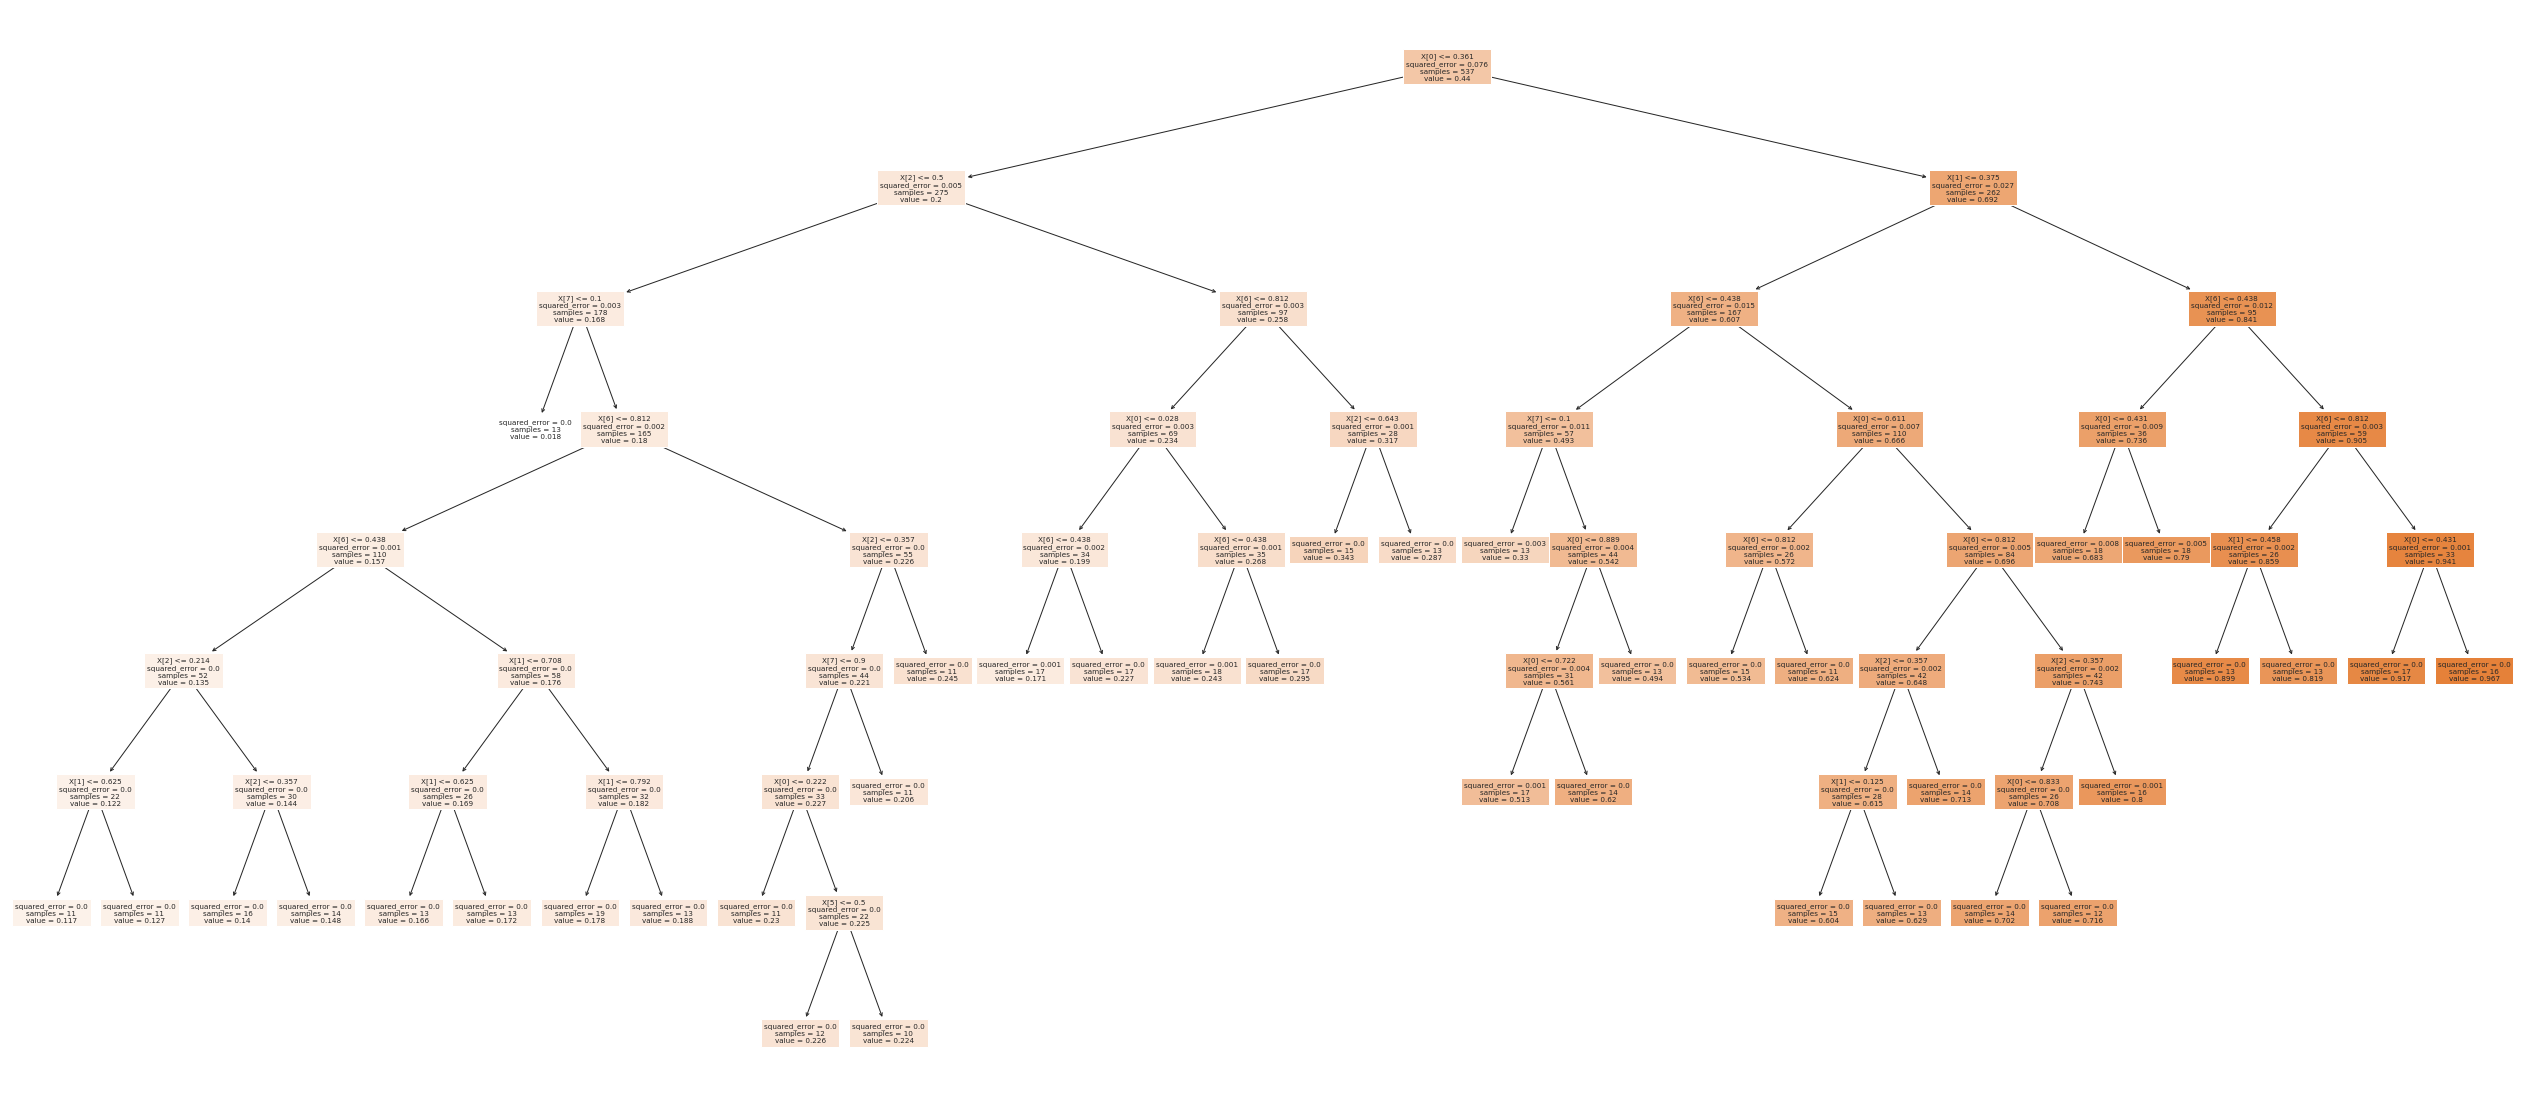

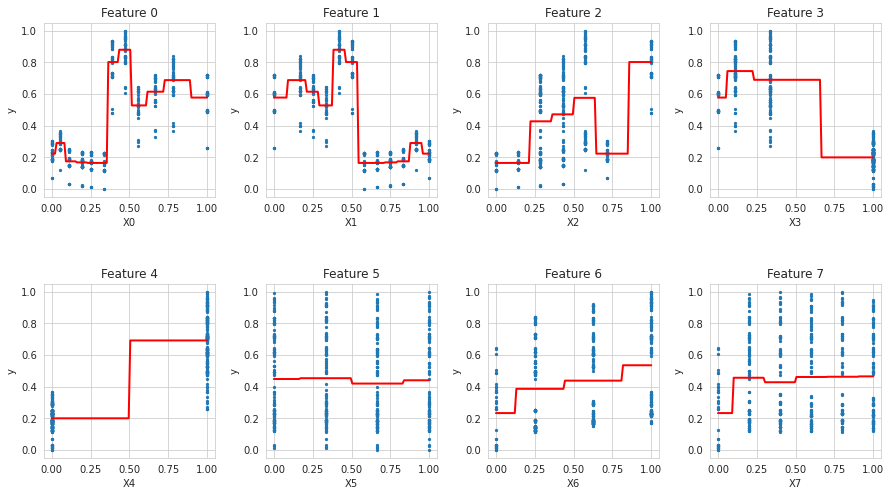

In [402]:
#Implementing grid_search from scratch
from sklearn.metrics import mean_squared_error
import numpy as np

def mse_grid_search(model, param_grid,X_train, y_train, X_val, y_val,cv=5):
    best_mse = np.inf
    best_params = {}
    best_model = None
    best_accuracy=-np.inf
    for max_depth in param_grid["max_depth"]:
        for min_samples_split in param_grid["min_samples_split"]:
            for max_features in param_grid["max_features"]:
                for min_samples_leaf in param_grid["min_samples_leaf"]:
                    model.set_params(max_depth=max_depth, min_samples_split=min_samples_split, max_features=max_features, min_samples_leaf=min_samples_leaf)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_val)
                    mse = mean_squared_error(y_val, y_pred)
                    accuracy = 100 - (np.sum(np.abs(y_pred - y_val)) /len(y_val)) * 100
                    if mse < best_mse:
                        best_mse = mse
                        best_params = {"max_depth": max_depth, "min_samples_split": min_samples_split,"max_features": max_features, "min_samples_leaf": min_samples_leaf}
                        best_model = model
                        best_accuracy=accuracy

    return best_model, best_params, best_mse,best_accuracy



#MSE(L2)
from sklearn.tree import DecisionTreeRegressor
ma_depths=[]
mi_sample_leaf=[]
mi_sample_split=[]
for i in range(1,11):
    ma_depths.append(i)
    mi_sample_leaf.append(i)
    if(i!=1):
        mi_sample_split.append(i)
ma_features=[]
for i in range(1, X_train.shape[1]):
    ma_features.append(i)
param_grid = {'max_depth':ma_depths,'min_samples_split': mi_sample_split,'max_features': ma_features,'min_samples_leaf': mi_sample_leaf}
# Create a decision tree regressor
dt_mse = DecisionTreeRegressor()
# Using scratch builtgrid_search
bst_model,bst_param,bst_mse,bst_accuracy = mse_grid_search(dt_mse, param_grid,X_train,y_train,X_val,y_val)
print("Best parameters: ", bst_param)
print("Best L2/mean_squared_error on validation set: ", bst_mse)
plt.figure(figsize=(45,20))
plot_tree(bst_model, filled=True)
plt.show()


from itertools import combinations

# Decision boundary by taking 8C2 feature combination
# feature_combi = list(combinations(range(X_train.shape[1]), 2))
# num_rows = (len(feature_combi) + 1) // 2  
# fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# for i, features in enumerate(feature_combi):
#     bst_param['max_features'] = 2
#     X_train_2combi = X_train.values[:, features]
#     dt = DecisionTreeRegressor(criterion='squared_error', **bst_param)
#     dt.fit(X_train_2combi, y_train.values)

#     x_min, x_max = X_train_2combi[:, 0].min() - 1, X_train_2combi[:, 0].max() + 1
#     y_min, y_max = X_train_2combi[:, 1].min() - 1, X_train_2combi[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
#     Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     # Plotting
#     row = i // 2
#     col = i % 2  
#     axs[row, col].contourf(xx, yy, Z, alpha=0.4)
#     # axs[row, col].scatter(X_train_2combi[:, 0], X_train_2combi[:, 1], c=y_train.values)
#     axs[row, col].set_title(f"Decision boundary for features X{features[0]} X{features[1]}")
#     axs[row, col].set_xlabel(f"Feature {features[0]}")
#     axs[row, col].set_ylabel(f"Feature {features[1]}")

# if len(feature_combi) % 2 != 0:
#     axs[num_rows-1, 1].remove()

# plt.show()

fig, axs = plt.subplots(2, 4, figsize=(15, 8))
fig.subplots_adjust(hspace = 0.5, wspace=0.3)
axs = axs.ravel()

for i in range(X_train.shape[1]):
    dt = DecisionTreeRegressor(criterion='squared_error', random_state=42)
    dt.fit(X_train.iloc[:,i].values.reshape(-1,1), y_train)
    
    # Create line plot for current feature
    x_range = np.linspace(X_train.iloc[:,i].min(), X_train.iloc[:,i].max(), 100)
    y_pred = dt.predict(x_range.reshape(-1,1))
    
    axs[i].scatter(X_train.iloc[:,i], y_train, s=5)
    axs[i].plot(x_range, y_pred, color='red', linewidth=2)
    axs[i].set_title(f'Feature {i}')
    axs[i].set_xlabel(f'X{i}')
    axs[i].set_ylabel('y')
    
plt.show()


Best parameters:  {'max_depth': 9, 'min_samples_split': 9, 'max_features': 6, 'min_samples_leaf': 1}
Best L1/mean_average_error on validation set:  0.008614338716132824


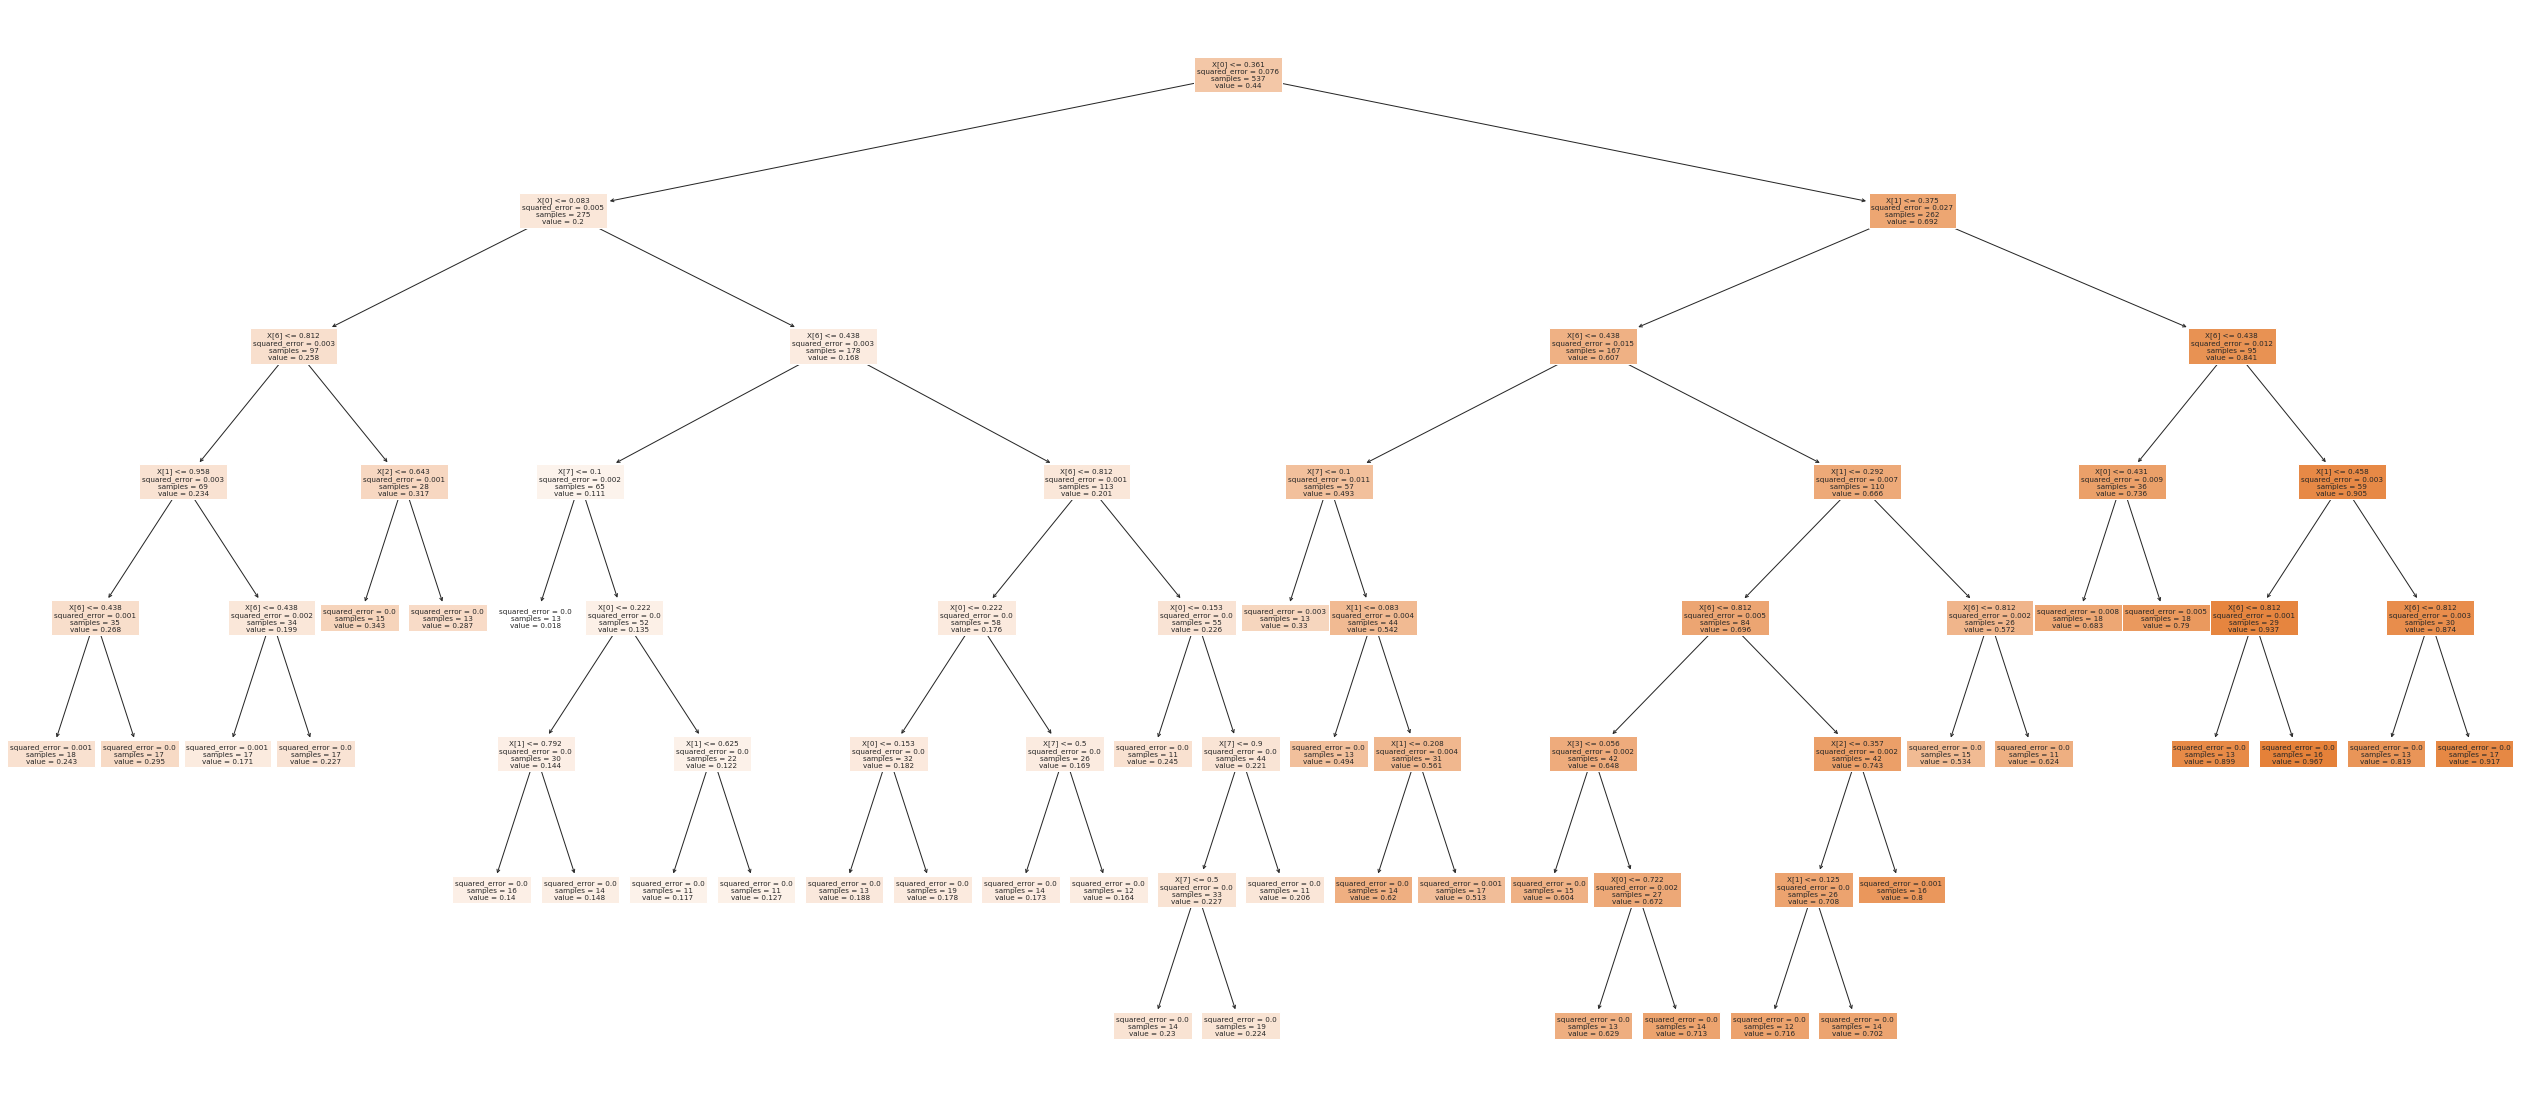

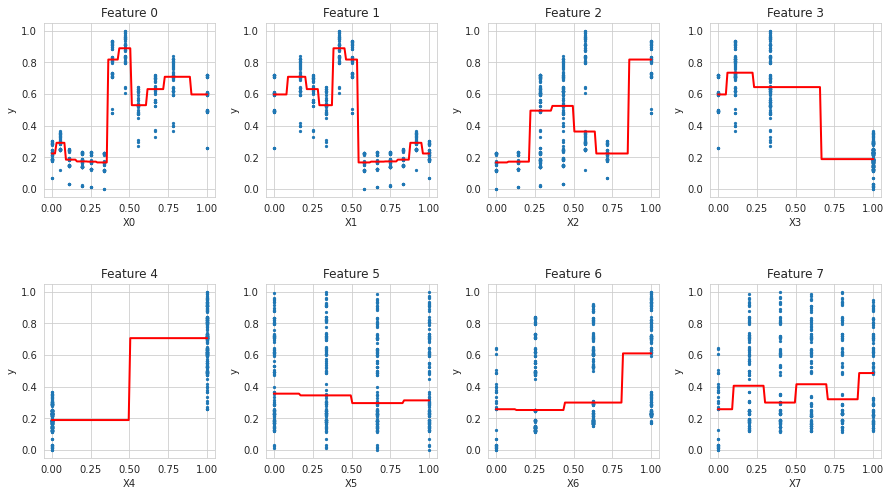

In [403]:
from sklearn.metrics import mean_absolute_error
def mae_grid_search(model, param_grid,X_train, y_train, X_val, y_val,cv=5):
    best_mae = np.inf
    best_params = {}
    best_model = None
    best_accuracy=-np.inf
    for max_depth in param_grid["max_depth"]:
        for min_samples_split in param_grid["min_samples_split"]:
            for max_features in param_grid["max_features"]:
                for min_samples_leaf in param_grid["min_samples_leaf"]:
                    model.set_params(max_depth=max_depth, min_samples_split=min_samples_split, max_features=max_features, min_samples_leaf=min_samples_leaf)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_val)
                    mae = mean_absolute_error(y_val, y_pred)
                    accuracy = 100 - (np.sum(np.abs(y_pred - y_val)) /len(y_val)) * 100
                    if mae < best_mae:
                        best_mae = mae
                        best_params = {"max_depth": max_depth, "min_samples_split": min_samples_split,"max_features": max_features, "min_samples_leaf": min_samples_leaf}
                        best_model = model
                        best_accuracy=accuracy

    return best_model, best_params, best_mae,best_accuracy



#MAE(L1)
from sklearn.tree import DecisionTreeRegressor
param_grid = {'max_depth':ma_depths,'min_samples_split': mi_sample_split,'max_features': ma_features,'min_samples_leaf': mi_sample_leaf}
dt_mae = DecisionTreeRegressor()
# Using scratch builtgrid_search
bst_model,bst_param,bst_mae,bst_accuracy = mae_grid_search(dt_mae, param_grid,X_train,y_train,X_val,y_val)
print("Best parameters: ", bst_param)
print("Best L1/mean_average_error on validation set: ", bst_mae)
plt.figure(figsize=(45,20))
plot_tree(bst_model, filled=True)
plt.show()

from itertools import combinations

# # Decision boundary by taking 8C2 feature combination
# feature_combi = list(combinations(range(X_train.shape[1]), 2))

# fig, axs = plt.subplots(len(feature_combi)//2, 2, figsize=(10, 75))

# for i, features in enumerate(feature_combi):
#     bst_param['max_features'] = 2
#     X_train_2combi = X_train.values[:, features]
#     dt = DecisionTreeRegressor(criterion='absolute_error', **bst_param)
#     dt.fit(X_train_2combi, y_train.values)

#     x_min, x_max = X_train_2combi[:, 0].min() - 1, X_train_2combi[:, 0].max() + 1
#     y_min, y_max = X_train_2combi[:, 1].min() - 1, X_train_2combi[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
#     Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     # Plotting
#     axs[i//2, i%2].contourf(xx, yy, Z, alpha=0.4)
#     # axs[i//2, i%2].scatter(X_train_2combi[:, 0], X_train_2combi[:, 1], c=y_train.values, s=20)
#     axs[i//2, i%2].set_title(f"Decision boundary for features X{features[0]} X{features[1]}")
#     axs[i//2, i%2].set_xlabel(f"Feature {features[0]}")
#     axs[i//2, i%2].set_ylabel(f"Feature {features[1]}")

# plt.show()

fig, axs = plt.subplots(2, 4, figsize=(15, 8))
fig.subplots_adjust(hspace = 0.5, wspace=0.3)
axs = axs.ravel()

for i in range(X_train.shape[1]):
    dt = DecisionTreeRegressor(criterion='absolute_error', random_state=42)
    dt.fit(X_train.iloc[:,i].values.reshape(-1,1), y_train)
    
    # Create line plot for current feature
    x_range = np.linspace(X_train.iloc[:,i].min(), X_train.iloc[:,i].max(), 100)
    y_pred = dt.predict(x_range.reshape(-1,1))
    
    axs[i].scatter(X_train.iloc[:,i], y_train, s=5)
    axs[i].plot(x_range, y_pred, color='red', linewidth=2)
    axs[i].set_title(f'Feature {i}')
    axs[i].set_xlabel(f'X{i}')
    axs[i].set_ylabel('y')
    
plt.show()



L2 is working better than L1. It is because L1 tends to perform better when there are a smaller number of important features , whereas L2 performs better when there are many features that are important. The same can also be seen in the decision boundary graphs.

#Problem 2

##Classification

###Starter code

In [404]:
#importing dataset
import os
os.system("wget https://www.dropbox.com/s/wvcta8bmbvqowq2/iris.csv")

0

In [405]:
import pandas as pd
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv('iris.csv', names=columns)

In [406]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [407]:
#Dropping sepal length and sepal width
df.drop(df.columns[[0, 1]], axis=1, inplace=True)

In [408]:
df

,petal_length,petal_width,species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [409]:
#converting df to X and y
y=df['species']
X=df.drop('species',axis=1)

In [410]:
#ordinal encoding
ordinal_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y=np.array(df['species'].map(ordinal_dict))
preservedX=X
preservedy=y

In [411]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [412]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

###Part 1

In [413]:
#Decission Tree Classifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2, random_state=100)
dtc.fit(X_train, y_train)
y_pred=dtc.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

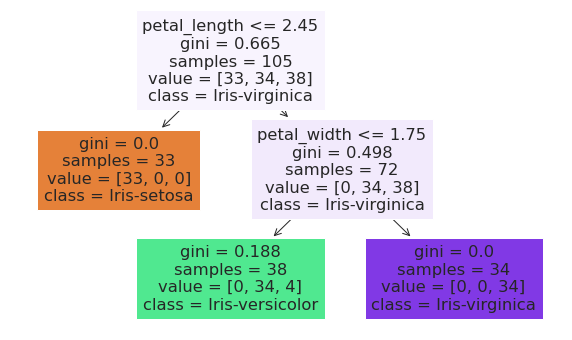

In [414]:
plt.figure(figsize=(10,6))
plot_tree(dtc, filled=True, feature_names=['petal_length', 'petal_width'], class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


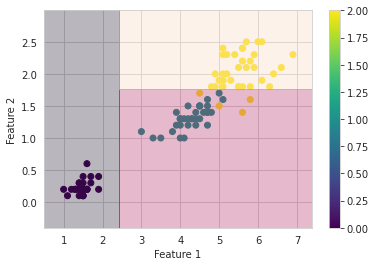

In [415]:
xx, yy = np.meshgrid(np.arange(X_train.values[:, 0].min() - 0.5, X_train.values[:, 0].max() + 0.5, 0.01),
                     np.arange(X_train.values[:, 1].min() - 0.5, X_train.values[:, 1].max() + 0.5, 0.01))
Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.contourf(xx, yy, Z, alpha=0.3)

plt.show()

###Part 2

In [416]:
X=preservedX
y=preservedy
X=X.values
print(X.shape)
print(y.shape)

(150, 2)
(150,)


In [417]:
#Remove the widest value row
for i in range(X.shape[0]):
    if (y[i] == 1 and X[i, 0] >= 4.8 and X[i, 1] >= 1.8):
        X = np.delete(X, np.array(i), axis=0)
        y = np.delete(y, np.array(i))
        break

In [418]:
from sklearn.model_selection import train_test_split
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.3, random_state=25)

In [419]:
#Decission Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2, random_state=100)
dtc.fit(X_train, y_train)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

DecisionTreeClassifier(max_depth=2, random_state=100)

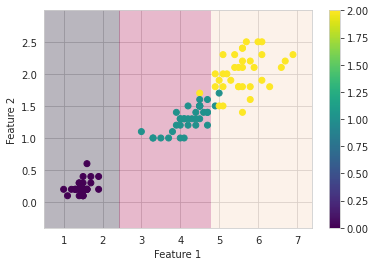

In [420]:
xx, yy = np.meshgrid(np.arange(X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5, 0.01),
                     np.arange(X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5, 0.01))
Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.show()

###Part 3

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


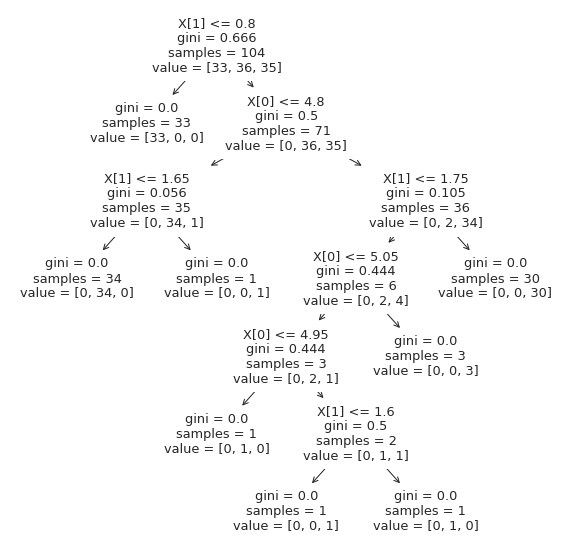

In [421]:
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(max_depth=None)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# accuracy_score
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Plot the decision boundary
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree, ax=ax)
plt.show()


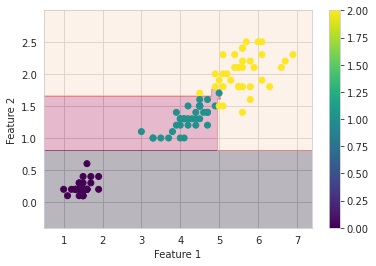

In [422]:
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 0.01),
                     np.arange(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 0.01))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.show()

###Part 4

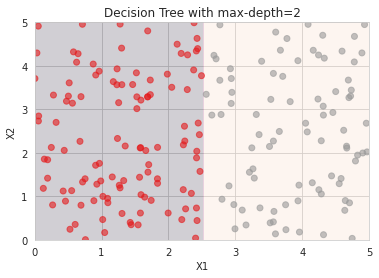

In [423]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# X=[X1,X2] and y
X = np.random.rand(200, 2) * 5
y = np.where(X[:, 0] < 2.5, 0, 1)

# train
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X, y)

# Plotting decision boundary
xx, yy = np.meshgrid(np.linspace(0, 5, 200), np.linspace(0, 5, 200))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1],c=y, alpha=0.6, cmap=plt.cm.Set1)
plt.title("Decision Tree with max-depth=2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


In [424]:
pred=dt.predict(X)
print(np.average(pred==y))

1.0


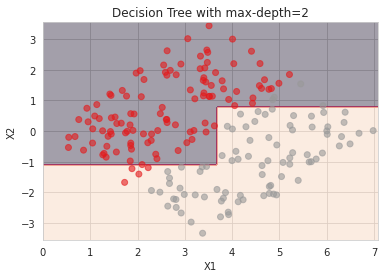

In [425]:
# rotate data by 45 degrees clockwise
theta = np.pi/4
rot_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                       [np.sin(theta), np.cos(theta)]])
X_rotated = X @ rot_matrix

dt_rotated = DecisionTreeClassifier(max_depth=2)
dt_rotated.fit(X_rotated, y)

# Plotting decision boundary
xx, yy = np.meshgrid(np.linspace(0, 5*(2**0.5)+0.01, 200), np.linspace((-5/(2**0.5))-0.01,(5/(2**0.5))+0.01, 200))
Z = dt_rotated.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], c=y, alpha=0.6, cmap=plt.cm.Set1)
plt.title("Decision Tree with max-depth=2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [426]:
pred=dt_rotated.predict(X_rotated)
print(np.average(pred==y))

0.96


##Regression

In [427]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
os.system("wget https://www.dropbox.com/s/hw9ndihitvi8p4f/task.csv")

0

In [428]:
df=pd.read_csv("task.csv")

In [429]:
df.describe()

,X,Y
count,200.000000,200.000000
mean,0.484006,0.353869
std,0.294891,0.313498
min,0.005522,-0.147309
25%,0.228582,0.101494
50%,0.494486,0.273546
75%,0.756860,0.603857
max,0.986887,1.143988


In [430]:
df

,X,Y
0,0.374540,-0.005042
1,0.950714,0.835799
2,0.731994,0.244592
3,0.598658,-0.032501
4,0.156019,0.659870
...,...,...
195,0.349210,-0.049795
196,0.725956,0.132379
197,0.897110,0.609442
198,0.887086,0.630434


In [431]:
df.isnull().sum()

X    0
Y    0
dtype: int64

In [432]:
#df to X,y
preservedX=X = df['X'].values.reshape(-1, 1)
preservedy=y = df['Y'].values.reshape(-1, 1)

##Part 1

In [433]:
dt1 = DecisionTreeRegressor(max_depth=2)
dt1.fit(X, y)

dt2 = DecisionTreeRegressor(max_depth=3)
dt2.fit(X, y)

DecisionTreeRegressor(max_depth=3)

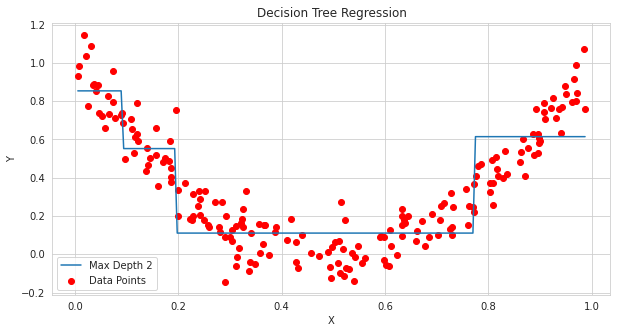

In [434]:
fig, axs = plt.subplots(1, figsize=(10, 5))
X_lin = np.linspace(X.min(), X.max(), num=200).reshape(-1, 1)
# Plotting the regression predictions and data points
axs.plot(X_lin, dt1.predict(X_lin), label='Max Depth {}'.format(2))
axs.scatter(X, y, c='r', label='Data Points')
    
axs.legend()
axs.set_title('Decision Tree Regression')
axs.set_xlabel('X')
axs.set_ylabel('Y')

plt.show()


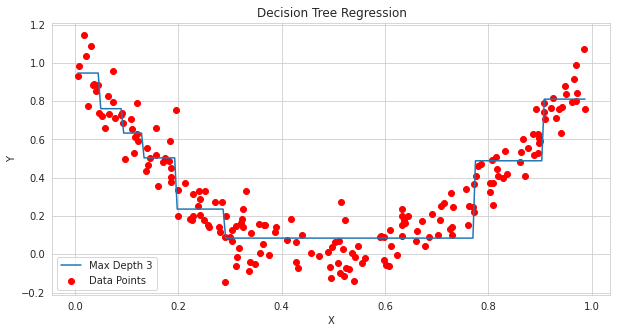

In [435]:
fig, axs = plt.subplots(1, figsize=(10, 5))
X_lin = np.linspace(X.min(), X.max(), num=200).reshape(-1, 1)
# Plotting the regression predictions and data points
axs.plot(X_lin, dt2.predict(X_lin), label='Max Depth {}'.format(3))
axs.scatter(X, y, c='r', label='Data Points')
    
axs.legend()
axs.set_title('Decision Tree Regression')
axs.set_xlabel('X')
axs.set_ylabel('Y')

plt.show()


##Part 2

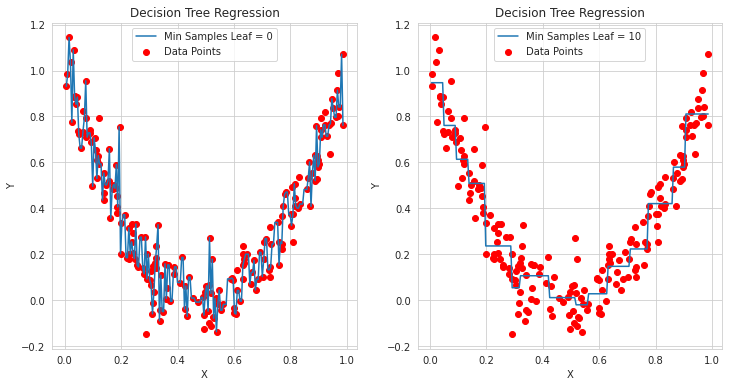

In [436]:
X = preservedX
y = preservedy

dt_0 = DecisionTreeRegressor(min_samples_leaf=0.001)
dt_10 = DecisionTreeRegressor(min_samples_leaf=10)
dt_0.fit(X, y)
dt_10.fit(X, y)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting min_samples_leaf = 0
x = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
ax1.plot(x, dt_0.predict(x), label='Min Samples Leaf = 0')
ax1.scatter(X, y, label='Data Points',c='r')
ax1.legend()
ax1.set_title('Decision Tree Regression')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Plotting min_samples_leaf = 10
x = np.linspace(min(X), max(X), 200).reshape(-1, 1)
ax2.plot(x, dt_10.predict(x), label='Min Samples Leaf = 10')
ax2.scatter(X, y, label='Data Points',c='r')
ax2.legend()
ax2.set_title('Decision Tree Regression')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

plt.show()


#Problem 3

##Initials

In [437]:
!pip install palmerpenguins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [438]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins
sns.set_style('whitegrid')

penguins = load_penguins()
penguins


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


##Part 1

In [439]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



# missing value
print(penguins.isnull().sum())

# Drop missing values
penguins = penguins.dropna()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [440]:
encoder = LabelEncoder()
penguins['island'] =encoder.fit_transform(penguins['island'])
penguins['sex'] =encoder.fit_transform(penguins['sex'])
penguins['year'] =encoder.fit_transform(penguins['year'])

<ipython-input-440-47236bd0df7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins['island'] =encoder.fit_transform(penguins['island'])
<ipython-input-440-47236bd0df7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins['sex'] =encoder.fit_transform(penguins['sex'])
<ipython-input-440-47236bd0df7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [441]:
penguins.describe()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.651652,43.992793,17.164865,200.966967,4207.057057,0.504505,1.042042
std,0.714715,5.468668,1.969235,14.015765,805.215802,0.500732,0.812944
min,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,0.000000
25%,0.000000,39.500000,15.600000,190.000000,3550.000000,0.000000,0.000000
50%,1.000000,44.500000,17.300000,197.000000,4050.000000,1.000000,1.000000
75%,1.000000,48.600000,18.700000,213.000000,4775.000000,1.000000,2.000000
max,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,2.000000


In [442]:
from sklearn.preprocessing import MinMaxScaler
#normalise
scaler = MinMaxScaler()
col_to_normalise=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins[col_to_normalise] = scaler.fit_transform(penguins[col_to_normalise])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [443]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,2,0.254545,0.666667,0.152542,0.291667,1,0
1,Adelie,2,0.269091,0.511905,0.237288,0.305556,0,0
2,Adelie,2,0.298182,0.583333,0.389831,0.152778,0,0
4,Adelie,2,0.167273,0.738095,0.355932,0.208333,0,0
5,Adelie,2,0.261818,0.892857,0.305085,0.263889,1,0
...,...,...,...,...,...,...,...,...
339,Chinstrap,1,0.861818,0.797619,0.593220,0.361111,1,2
340,Chinstrap,1,0.414545,0.595238,0.508475,0.194444,0,2
341,Chinstrap,1,0.636364,0.607143,0.355932,0.298611,1,2
342,Chinstrap,1,0.680000,0.702381,0.644068,0.388889,1,2


In [444]:
#penguins to X,y
y=penguins['species']
X=penguins.drop(('species'),axis=1)

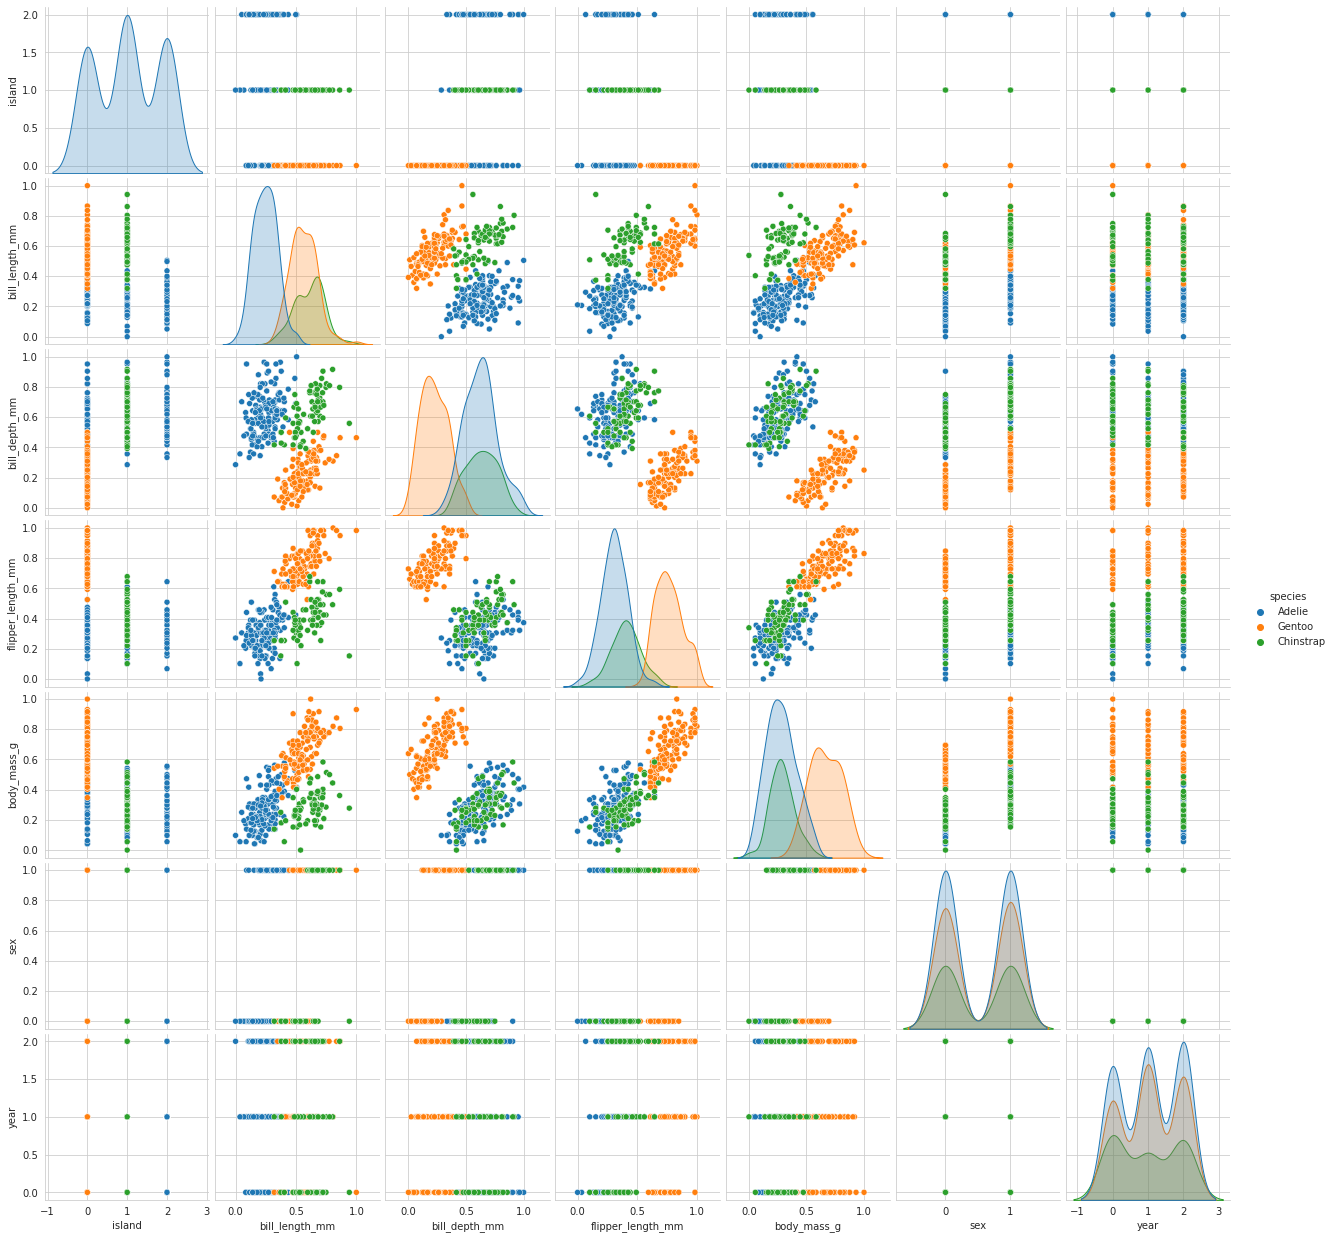

In [445]:
#Visualisation
sns.pairplot(penguins, hue='species')
plt.show()

In [446]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

##Part 2

In [447]:
import numpy as np
#Roll number is B21AI027 i.e. odd number
def gini_index(y):
    counts = len(y)
    uniq_classes = np.unique(y)
    
    arr = []
    y_dict={}
    for i in y:
        if i not in y_dict:
            y_dict[i]=1
        else:
            y_dict[i]+=1

            
    for i in uniq_classes:
        arr.append(y_dict[i]/counts)
        
    # Gini index per class
    gini = 1 - np.sum(np.array(arr)**2)
    return gini


In [448]:
gini_index(y)

0.6383680978275572

##Part 3

In [449]:
def cont_to_cat(X, y):
    Xbar = X.copy()
    threshold_arr=[]
    for col in Xbar.select_dtypes(include=['float64']):
        uniq_values = Xbar[col].unique()
        gini_splits = []
        for i in range(len(uniq_values)):
            # Splitting column
            split1 = y[Xbar[col] <= uniq_values[i]]
            split2 = y[Xbar[col] > uniq_values[i]]
            
            # Calculating gini
            gini1 = gini_index(split1)
            gini2 = gini_index(split2)
            
            # Calculate the weighted average gini index for the split
            weight1 = len(split1) / len(y)
            weight2 = len(split2) / len(y)
            gini_split = weight1 * gini1 + weight2 * gini2
            gini_splits.append(gini_split)
        
        # best split
        bst_split = np.argmin(gini_splits)
        threshold_le = uniq_values[bst_split]
        threshold_arr.append(threshold_le)
        Xbar[col] = np.where(Xbar[col] <= threshold_le, 0, 1)
    return Xbar,threshold_arr

col_to_categorise=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
converted_cate, threshold_arr = cont_to_cat(penguins[col_to_categorise], penguins['species'])
penguins[col_to_categorise] = converted_cate
print(threshold_arr)
penguins=penguins.drop(('species'),axis=1)
penguins.head()

#Reassigning new refined penguins to X
X=penguins

[0.37090909090909085, 0.3928571428571428, 0.5762711864406782, 0.5]


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


##Part 4,5,6

In [450]:
class Node:
    def __init__(self, X, y, depth, done_col, gini):
        self.X = X
        self.y = y
        self.depth = depth
        self.done_col = done_col
        self.nodes = []
        self.gini = gini
        self.split_col = None


class DT:
    def __init__(self, max_depth):
        self.max_depth = max_depth
    
    def fit(self, X, y):
        self.root = Node(X, y, 0, [], gini_index(y))
        self.build_tree(self.root)
    
    def build_tree(self, node):
        if node.depth == self.max_depth:
            return self.most_common_pred(node.y)
        if node.gini == 0:
            return self.most_common_pred(node.y)
        best_col, ginis = self.best_split(node.X, node.y, node.done_col, node.gini)
        node.gini = ginis
        if best_col is None:
            return self.most_common_pred(node.y)
        node.done_col.append(best_col)
        sending_done_col=node.done_col.copy()
        node.split_col = best_col
        for val in np.unique(node.X[:, best_col]):
            child_X = node.X[node.X[:, best_col] == val]
            child_y = node.y[node.X[:, best_col] == val]
            child_node = Node(child_X, child_y, node.depth+1, sending_done_col, node.gini)
            node.nodes.append(child_node)
            self.build_tree(child_node)
    
    def best_split(self, X, y, done_col, gini):
        best_gain = 0
        best_col = None
        best_val = None
        for col in range(X.shape[1]):
            if col not in done_col:
                gin = 0
                for val in np.unique(X[:, col]):
                    left_y = y[X[:, col] == val]
                    if len(left_y) > 0:
                        gin += (len(left_y)/len(y))*gini_index(left_y)
                if gini-gin > best_gain:
                    best_gain = gini-gin
                    best_col = col
        if best_col is None:
            return None, gini
        return best_col, gini-best_gain

    def most_common_pred(self, y):
        #cnt for each class
        cnt = {}
        for i in range(len(y)):
            if y[i] not in cnt:
                cnt[y[i]] = 0
            cnt[y[i]] += 1 
        #find max
        max_cnt = 0
        max_class = None
        for key in cnt:
            if cnt[key] > max_cnt:
                max_cnt = cnt[key]
                max_class = key
        return max_class
    
    def predict(self, X_test):
        preds = []
        for i in range(X_test.shape[0]):
            curr_node = self.root
            while curr_node.nodes:
                split_col = curr_node.split_col
                split_val = X_test[i, split_col]
                found_child = False
                for child_node in curr_node.nodes:
                    if child_node.X[0, split_col] == split_val:
                        curr_node = child_node
                        found_child = True
                        break
                if not found_child:
                    break
            pred = self.most_common_pred(curr_node.y)
            preds.append(pred)
        return preds
    def accuracy(self, X_test, y_test):
        preds = self.predict(X_test)
        return np.average(preds == y_test)

    def class_wise_accuracy(self, X_test, y_test):
        preds = self.predict(X_test)
        preds=np.array(preds)
        class_acc=[]
        class_name=[]
        for i in (np.unique(y_test)):
            class_acc.append(np.average(preds[y_test==i] == y_test[y_test==i]))
            class_name.append(i)
        
        per_class_acc={}
        for i in range(len(class_name)):
            per_class_acc[class_name[i]]=class_acc[i]

        return per_class_acc


In [451]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [452]:
dt=DT(max_depth=5)
dt.fit(X_train.values,y_train.values)

In [453]:
dt.accuracy(X_test.values,y_test.values)

1.0

In [454]:
dt.class_wise_accuracy(X_test.values,y_test.values)

{'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}